<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_h%C3%A0nh_H%E1%BB%93i_qui_tuy%E1%BA%BFn_t%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Thực hành] Xây dựng mô hình hồi quy tuyến tính dự báo tiền lương**

In [1]:
import pandas as pd # Khai báo thư viện hỗ trợ đọc và phân tích dữ liệu ở dạng bảng
dataset = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10170155/salary_data.csv") # Lấy dữ liệu từ file work_data.csv đê phân tích và đặt tên dữ liệu đó là dataset
dataset.tail(10) # xem 5 dòng đầu tiên của bảng dữ liệu

,SoNamKinhNghiem,Luong,NganhNghe
1416,4,14.9,Sale
1417,1,9.5,Sale
1418,8,22.9,Sale
1419,1,9.4,Sale
1420,9,25.0,Sale
1421,8,22.8,Sale
1422,6,18.7,Sale
1423,0,7.3,Sale
1424,0,7.2,Sale
1425,10,27.0,Sale


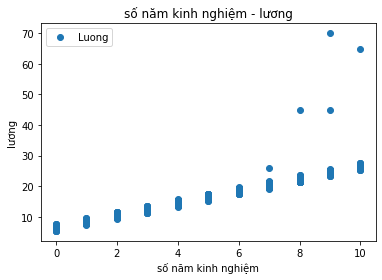

In [2]:
import matplotlib.pyplot as plt  # Khai báo thư viện để vẽ hình
dataset.plot(x='SoNamKinhNghiem', y='Luong', style='o')  
plt.title('số năm kinh nghiệm - lương')  
plt.xlabel('số năm kinh nghiệm')  
plt.ylabel('lương')  
plt.show()

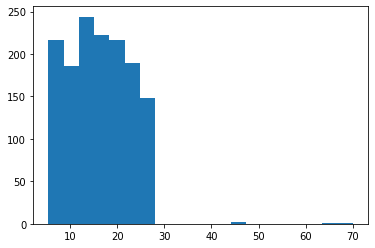

In [3]:
# vẽ biểu đồ histogram
plt.hist(dataset['Luong'],20)
plt.show()

In [4]:
df_keToan = dataset[dataset["NganhNghe"] == "KeToan"]
df_hcnh = dataset[dataset["NganhNghe"] == "HCNS"]
df_sale = dataset[dataset["NganhNghe"] == "Sale"]

print ("Kết cấu bộ dữ liệu")
print ("Số lượng mẫu nhân viên kế toán: " + str(df_keToan.shape[0]))
print ("Số lượng mẫu nhân viên HCNH: " + str(df_hcnh.shape[0]))
print ("Số lượng mẫu nhân viên SALE: " + str(df_sale.shape[0]))

Kết cấu bộ dữ liệu
Số lượng mẫu nhân viên kế toán: 472
Số lượng mẫu nhân viên HCNH: 566
Số lượng mẫu nhân viên SALE: 388


In [5]:
n_by_nganhNghe = dataset.groupby("NganhNghe")["Luong"].mean()
n_by_nganhNghe

NganhNghe
HCNS      16.556537
KeToan    15.645975
Sale      16.782216
Name: Luong, dtype: float64

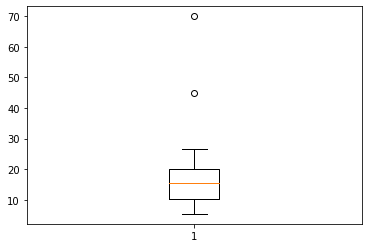

In [6]:
# Biểu đồ phân bố lương của nhân viên Kế toán
plt.boxplot(df_keToan['Luong'])
plt.show()

# . Xây dựng model dự đoán tiền lương theo số năm kinh nghiệm

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = dataset['SoNamKinhNghiem'].values.reshape(-1,1)
y = dataset['Luong'].values.reshape(-1,1)
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) #Huấn luyện mô hình
print( "Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm \nvới các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm 
với các hệ số a và b lần lượt là
[6.35592115]
[[2.03289729]]


# . Đánh giá mô hình

In [8]:
y_pred = regressor.predict(X_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

df = pd.DataFrame({'số năm kinh nghiệm': X_test.flatten(), 'Lương Thực tế': y_test.flatten(), 'Lương Dự báo': y_pred.flatten()})
print("\n") # xuống dòng
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred))  

R2 trên tập huấn luyện của model là:0.9318331044271062
R2 trên tập kiểm tra của model là:0.8762196686203844


Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 0.5566819767125355


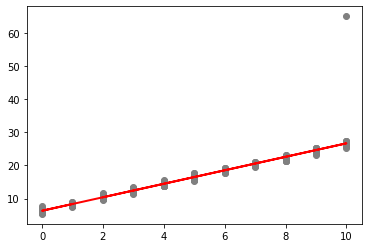

In [9]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Lưu trữ và sử dụng mô hình sau đã huấn luyện

In [10]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
filename = 'model.sav'
pickle.dump(regressor, open(filename, 'wb'))

# Sử dụng mô hình sau đã lưu

In [11]:
# Some time later.....
# sử dụng mô hình
#loaded_model = LinearRegression()
loaded_model = pickle.load(open(filename, 'rb'))
x = [[1],[2],[4]]
y_pred = loaded_model.predict(x)
y_pred

array([[ 8.38881844],
       [10.42171574],
       [14.48751032]])

# **[Thực hành] Xây dựng mô hình hồi quy tuyến tính trên bộ dữ liệu House Price**

In [12]:
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [13]:
import os
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10171754/AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [14]:
df.shape

(2930, 82)

# Tiền xử lý dữ liệu

In [15]:
#Since Regression needs numerical features,convert categorical columns into dummy variables
df1= pd.get_dummies(df)
df1.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


Kiểm tra và liệt kê những cột thiếu dữ liệu

In [16]:
#Look for columns with any NaN(missing) values
df1.columns[df1.isna().any()].tolist()

#Number of NaN values columnwise
df1.isna().sum()

Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              490
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 307, dtype: int64

In [17]:
#Define function to impute series with it's median
def impute_median(series):
    return series.fillna(series.median())
df1['Lot Frontage']= df1['Lot Frontage'].transform(impute_median)
df1['Mas Vnr Area']=df1['Mas Vnr Area'].transform(impute_median)
df1['BsmtFin SF 1']=df1['BsmtFin SF 1'].transform(impute_median)
df1['BsmtFin SF 2']=df1['BsmtFin SF 2'].transform(impute_median)
df1['Bsmt Unf SF']=df1['Bsmt Unf SF'].transform(impute_median)
df1['Total Bsmt SF']=df1['Total Bsmt SF'].transform(impute_median)
df1['Bsmt Full Bath']=df1['Bsmt Full Bath'].transform(impute_median)
df1['Bsmt Half Bath']=df1['Bsmt Half Bath'].transform(impute_median)
df1['Garage Cars']=df1['Garage Cars'].transform(impute_median)
df1['Garage Area']=df1['Garage Area'].transform(impute_median)
#Check remaining columns with NaN values
df1.columns[df1.isna().any()].tolist()

['Garage Yr Blt']

In [18]:
#Drop this column
df2=df1.drop('Garage Yr Blt',axis=1)

# Xử lý dữ liệu

In [19]:
#Define target array y
y= df2['SalePrice'].values

#Create feature array X
X= df2.drop('SalePrice',axis=1).values

In [20]:
#Check X's shape
X.shape

(2930, 305)

In [21]:
#Check Y's shape
y.shape

(2930,)

In [22]:
#Reshape y to have 1 column
y=y.reshape(-1,1)
y.shape

(2930, 1)

Chia dữ liệu

In [23]:
#Split the arrays into training and testing data sets
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# Huấn luyện mô hình

In [24]:
#Create a regressor object
LR= LinearRegression()

#Fit training set to the regressor
LR.fit(X_train,y_train)

#print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
#print("Intercept =", LR.intercept_)
#print("Coefficients:", LR.coef_)

LinearRegression()

In [25]:
#Make predictions with the regressor
y_prediction = LR.predict(X_test)

In [ ]:
# Calculate R2-score
score=r2_score(y_test,y_pred)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))